In [35]:
import pandas as pd 
train = pd.read_csv('training_residuals_nodiff.csv')
test = pd.read_csv('test_residuals_nodiff.csv')
social_train = pd.read_csv('training_residuals_nodiff_sent.csv')
social_test = pd.read_csv('test_residuals_nodiff_sent.csv')

In [36]:
coin_list =  ['aave','algo','atom','btc',
 'etc','eth','link','snx','uni','wbtc','zec']

In [37]:
import pandas as pd

# Assuming test and social_test are your pandas DataFrames
merged_data = pd.merge(test, social_test, on=['Date', 'Coin'], how='inner', suffixes=('', '_social'))

# Drop the 'actual_social' column as it's a duplicate
merged_data.drop('actual_social', axis=1, inplace=True)


In [40]:
merged_data

,Date,Coin,actual,predicted,Residual,predicted_social,Residual_social
0,2023-04-26,aave,-0.410620,-0.410523,-0.000098,-0.410155,-4.655047e-04
1,2023-04-27,aave,-0.410464,-0.410434,-0.000030,-0.410068,-3.958311e-04
2,2023-04-28,aave,-0.410404,-0.410283,-0.000121,-0.409871,-5.332208e-04
3,2023-04-29,aave,-0.410436,-0.410296,-0.000140,-0.409906,-5.300364e-04
4,2023-04-30,aave,-0.410556,-0.410374,-0.000182,-0.409982,-5.735448e-04
...,...,...,...,...,...,...,...
811,2023-06-08,zrx,-0.416009,-0.416017,0.000008,-0.416008,-9.121326e-07
812,2023-06-09,zrx,-0.416009,-0.416018,0.000008,-0.416008,-1.424487e-06
813,2023-06-10,zrx,-0.416011,-0.416020,0.000009,-0.416011,-6.690006e-07
814,2023-06-11,zrx,-0.416011,-0.416019,0.000008,-0.416010,-7.721861e-07


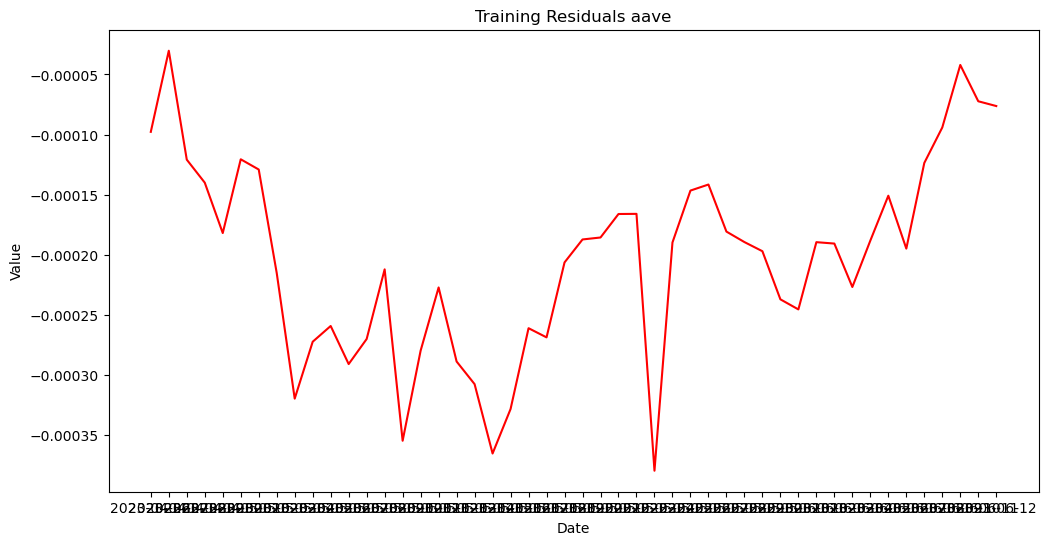

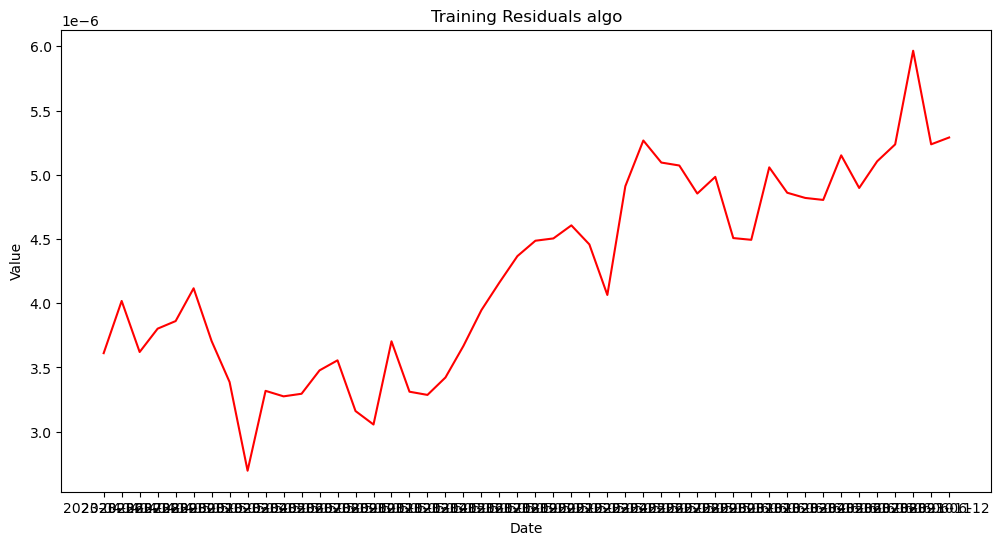

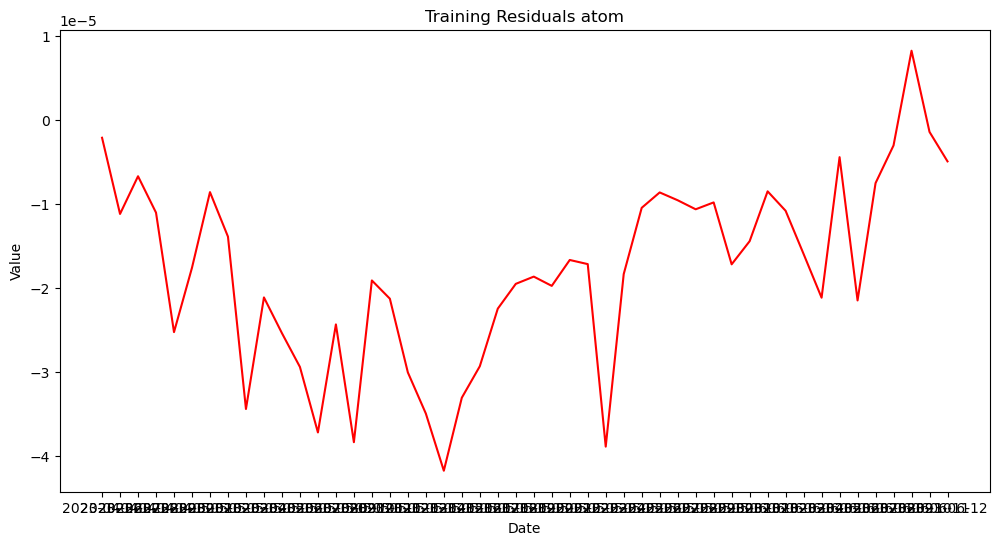

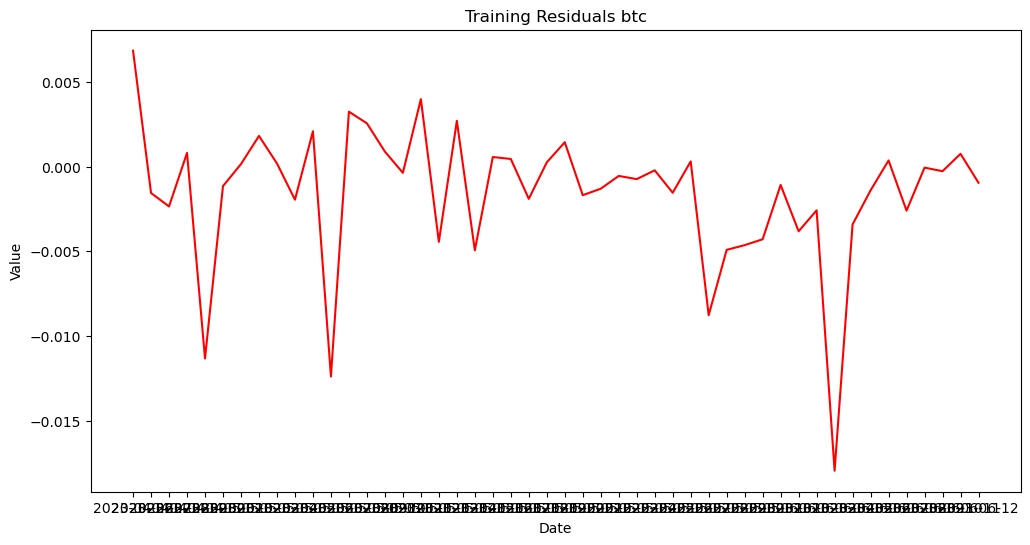

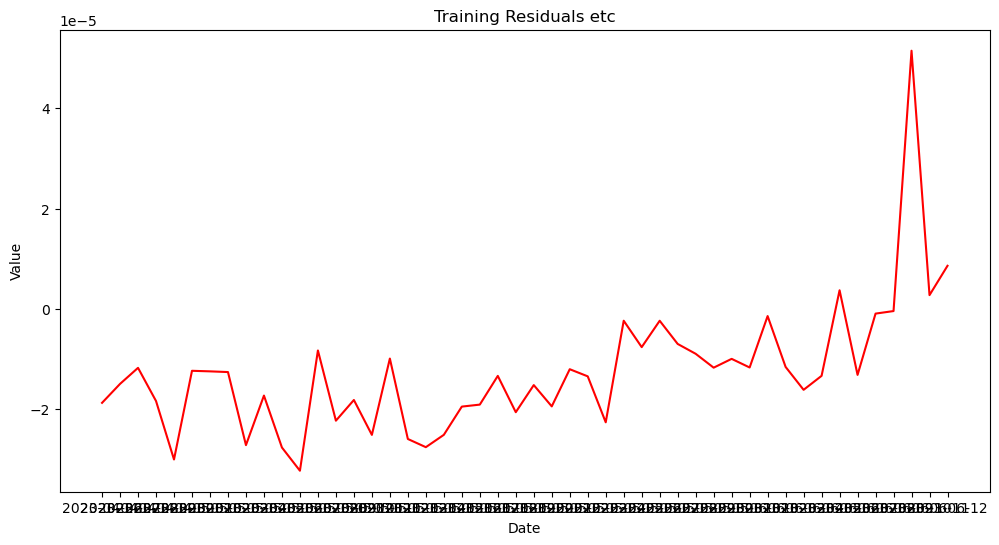

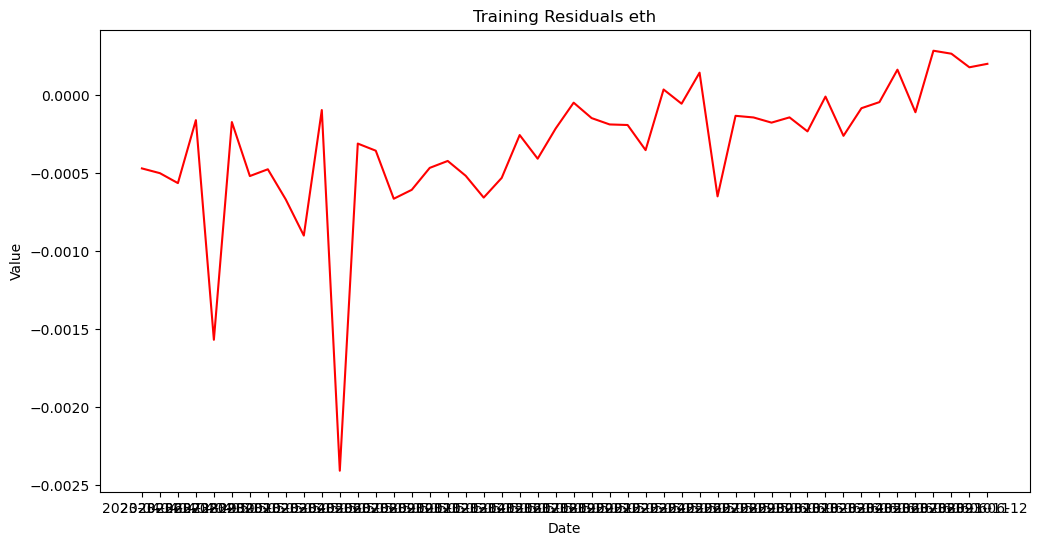

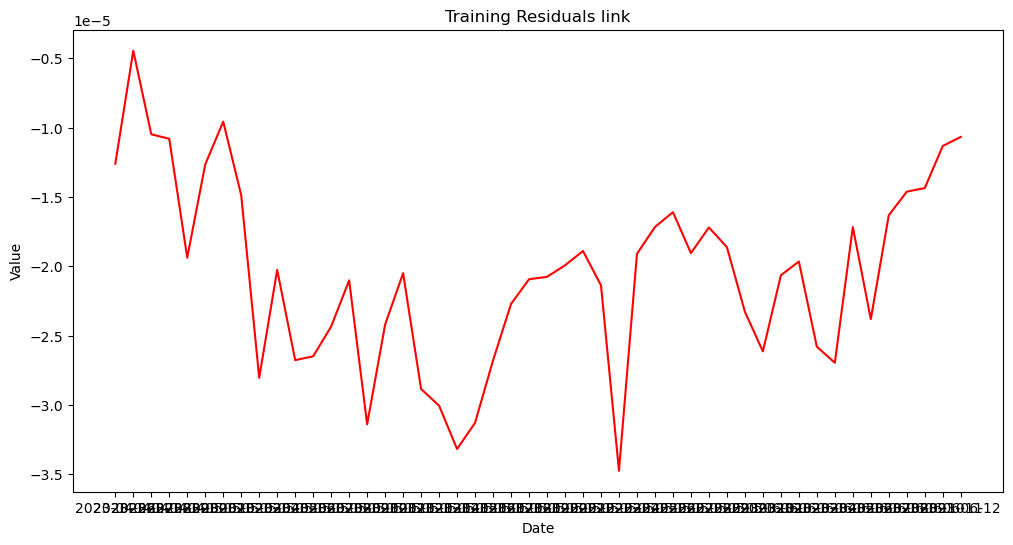

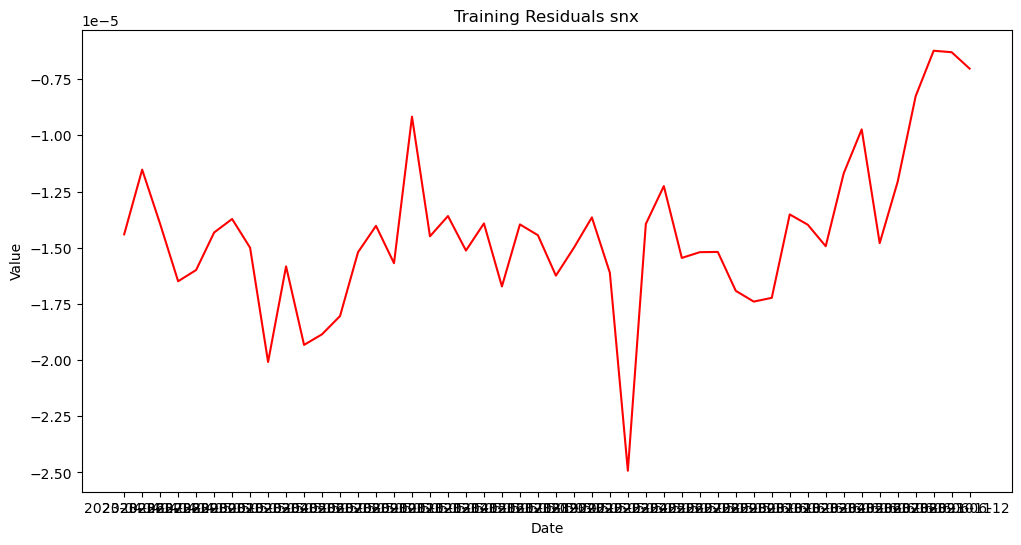

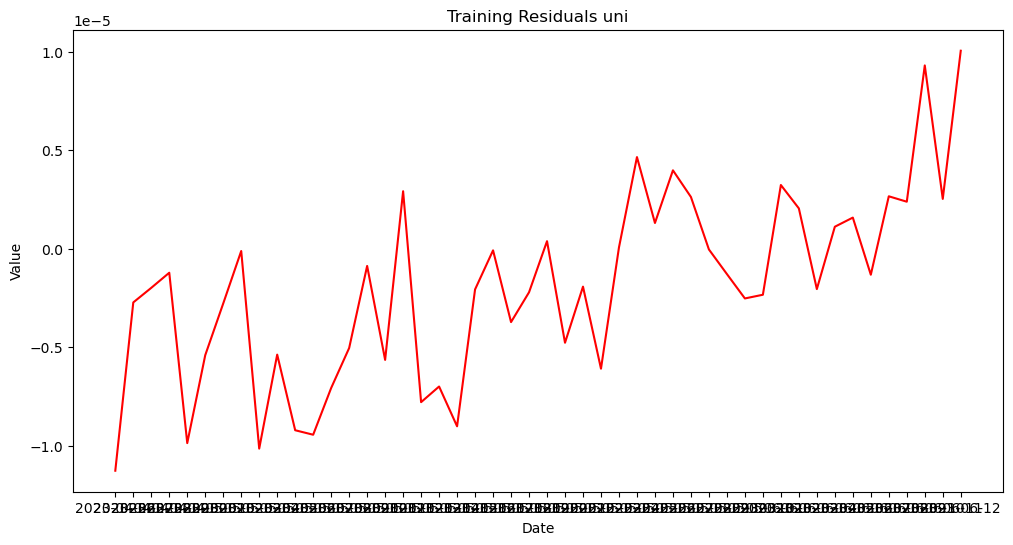

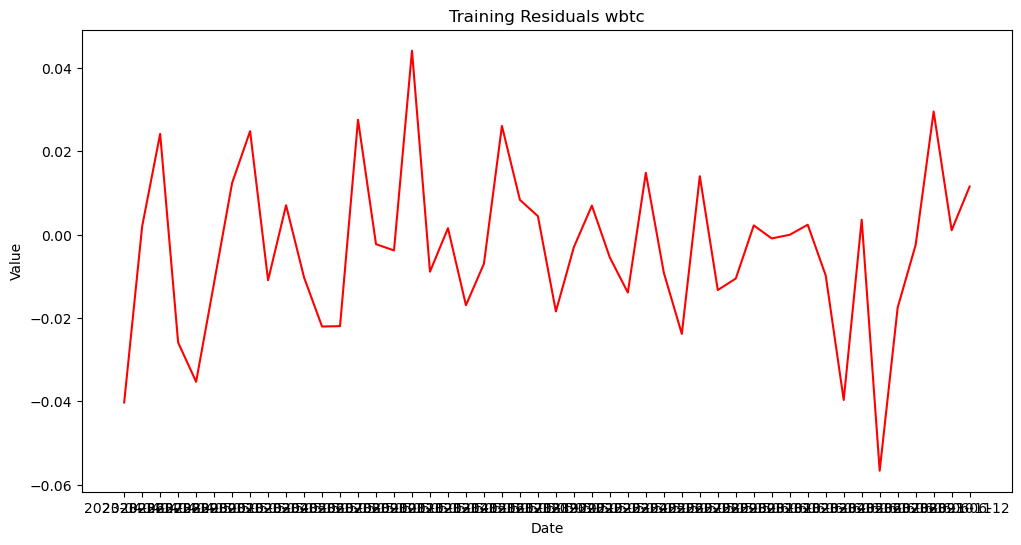

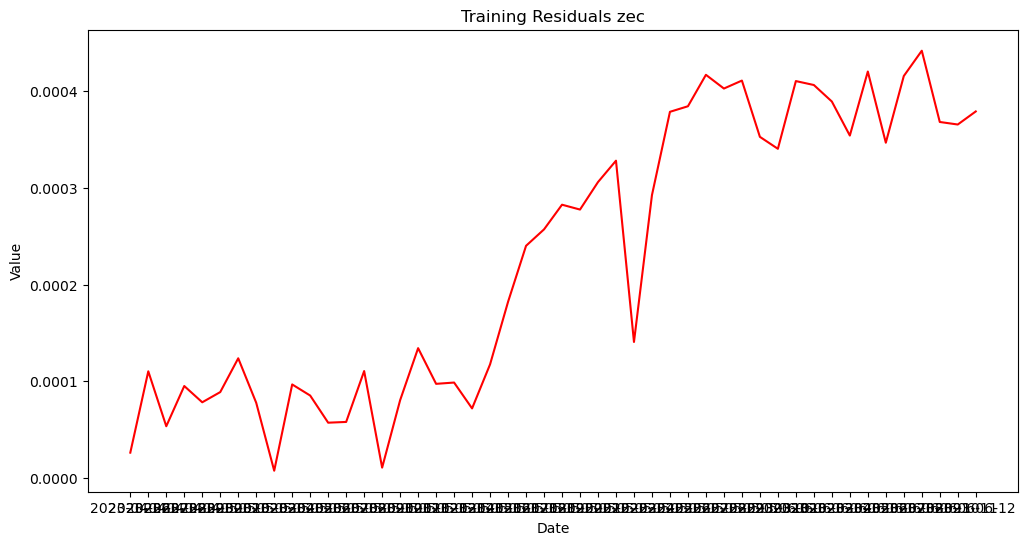

In [41]:
# Training Residuals BASE MODEL
for coin in coin_list:
    coin_data = merged_data[merged_data['Coin'] == coin]
    plt.figure(figsize=(12, 6))
    plt.plot(coin_data['Date'], coin_data['Residual'], color='red')
    plt.title(f'Training Residuals {coin}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()

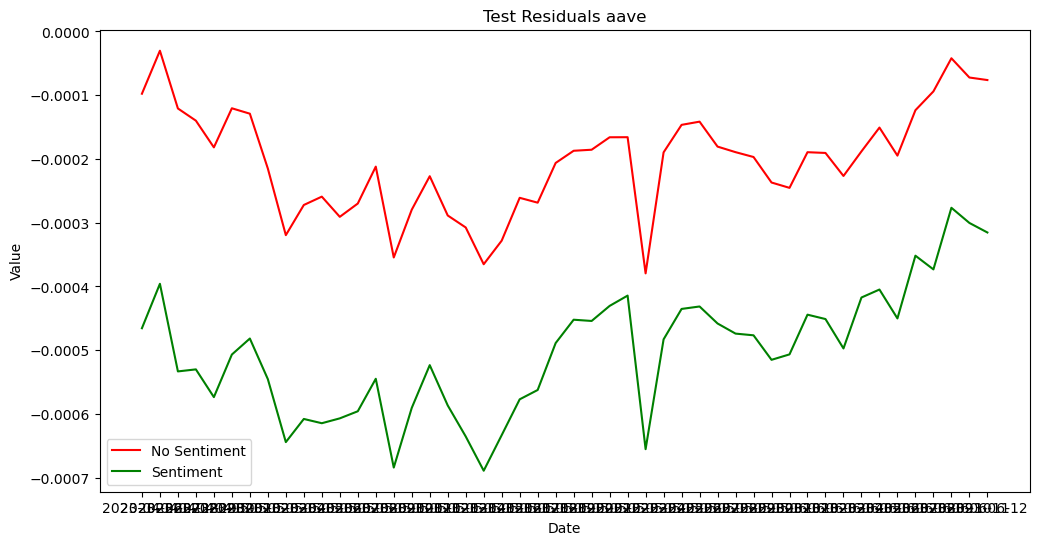

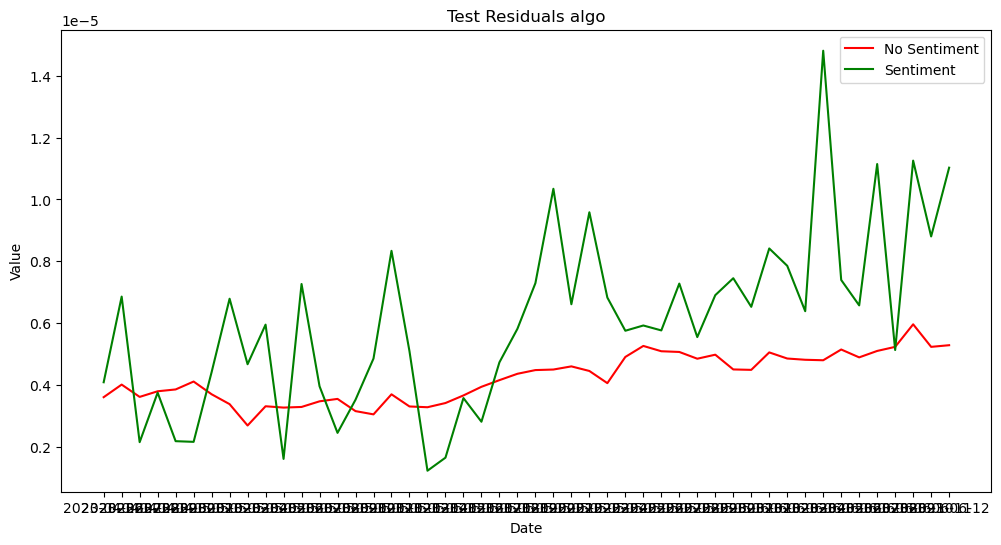

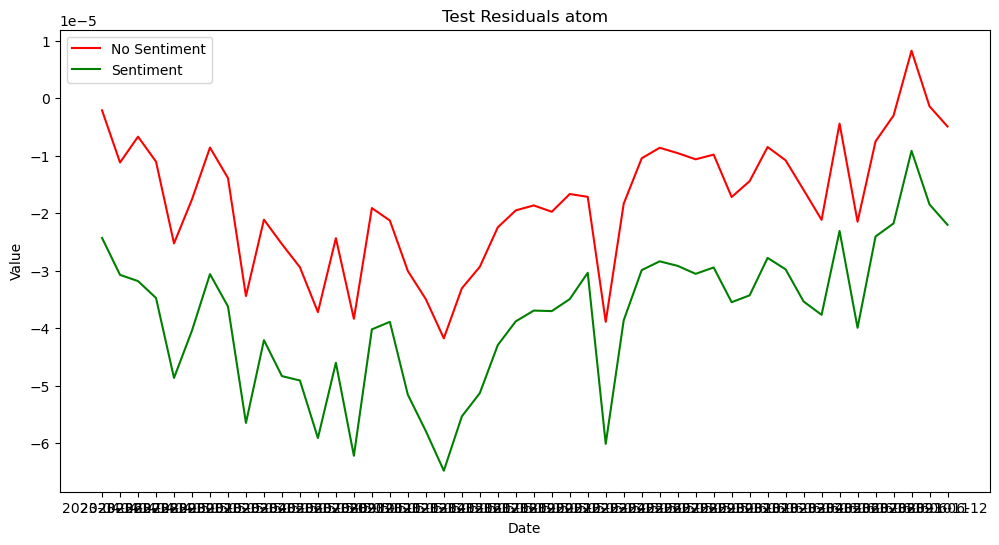

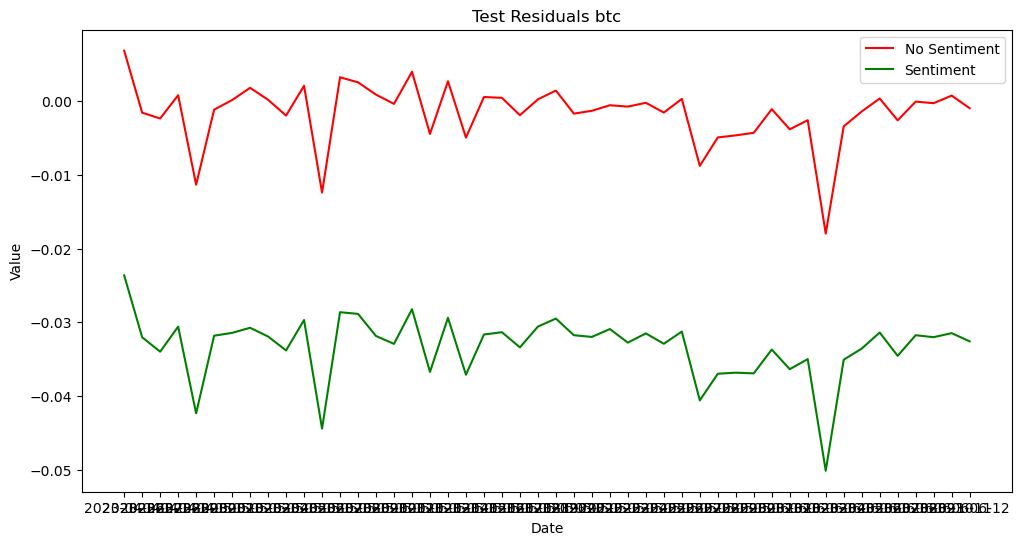

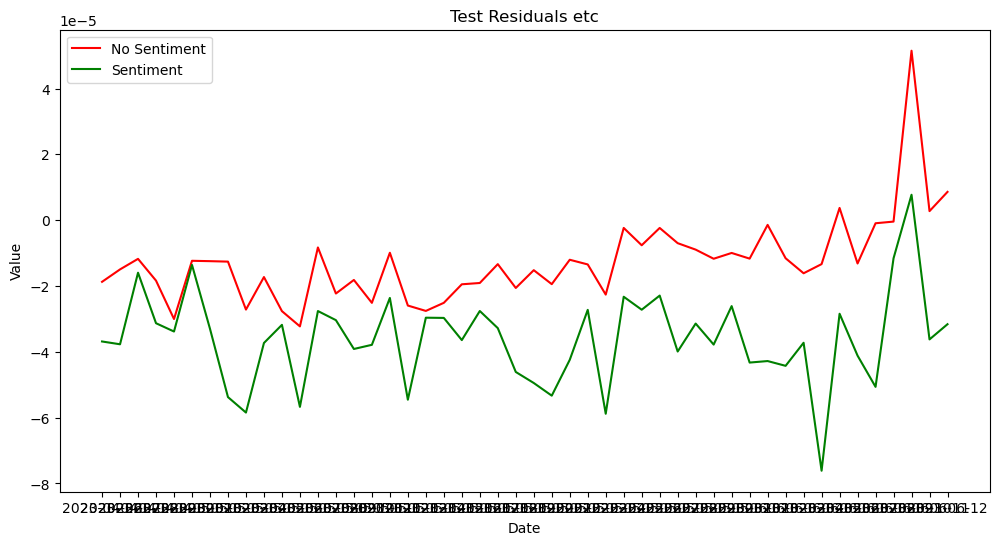

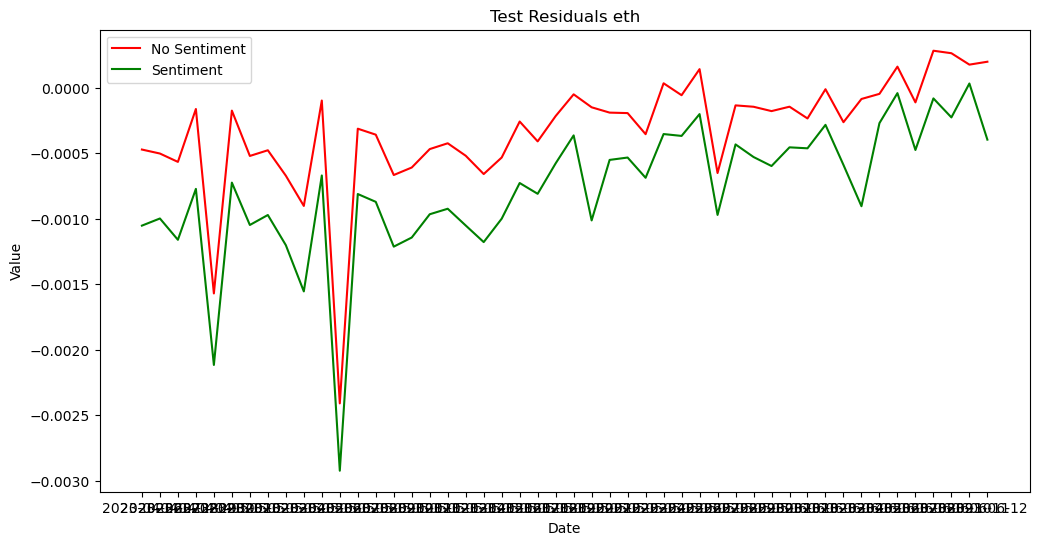

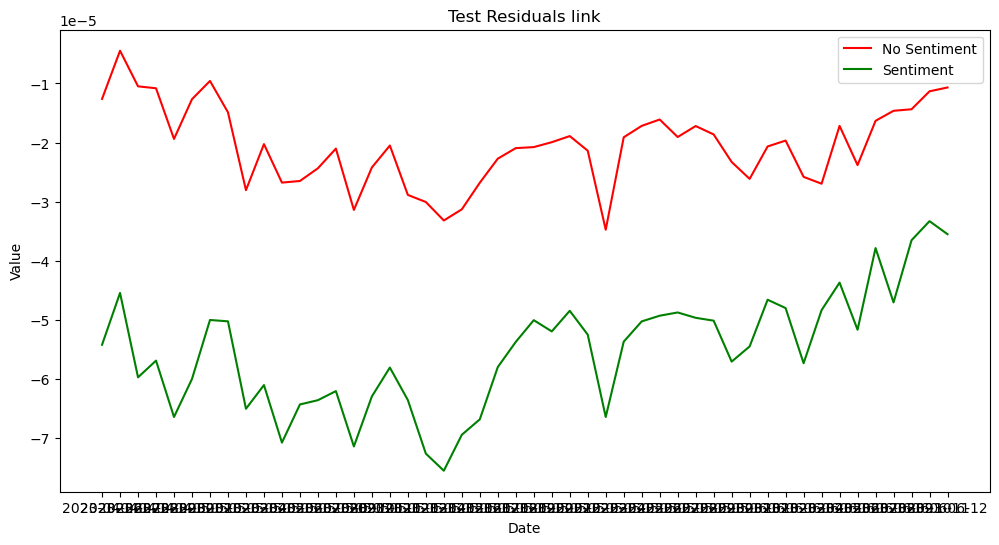

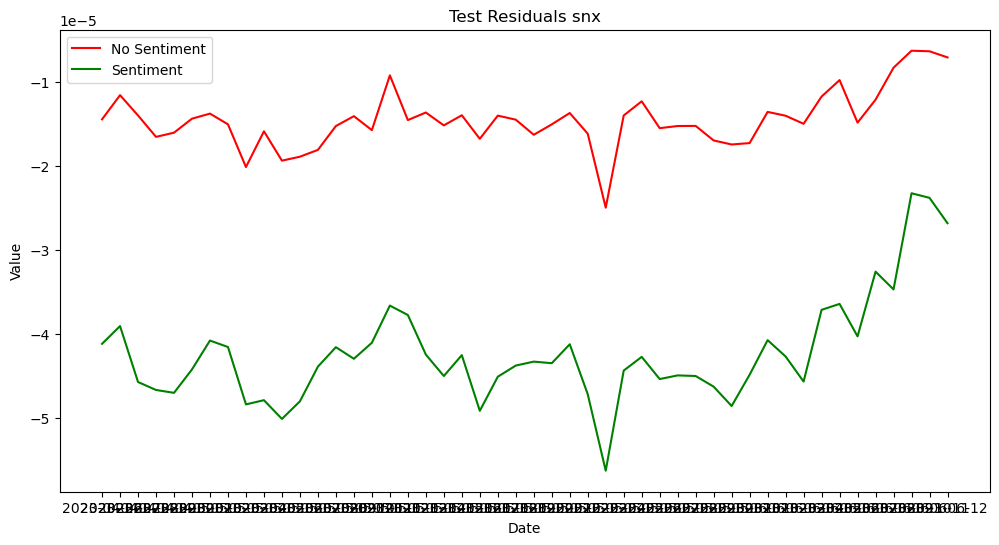

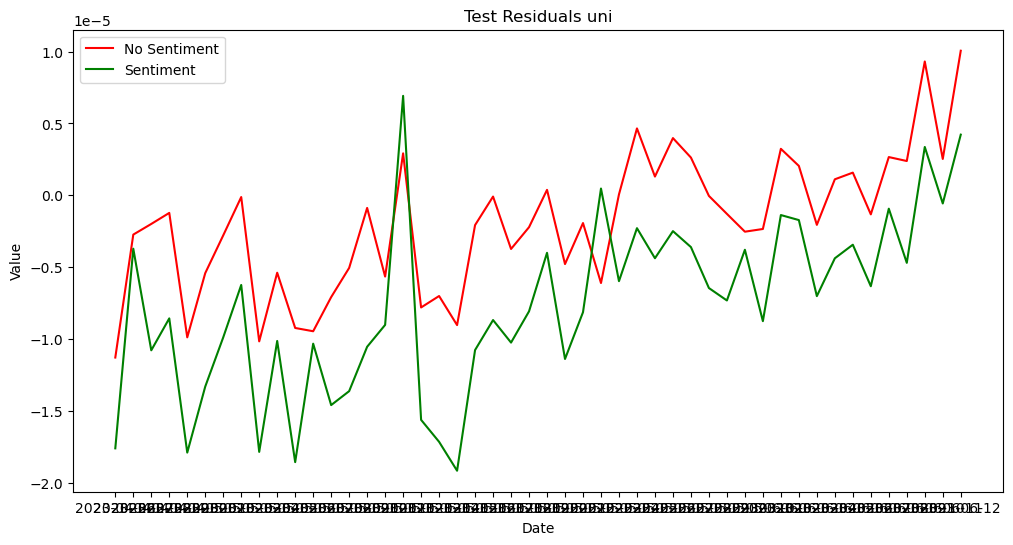

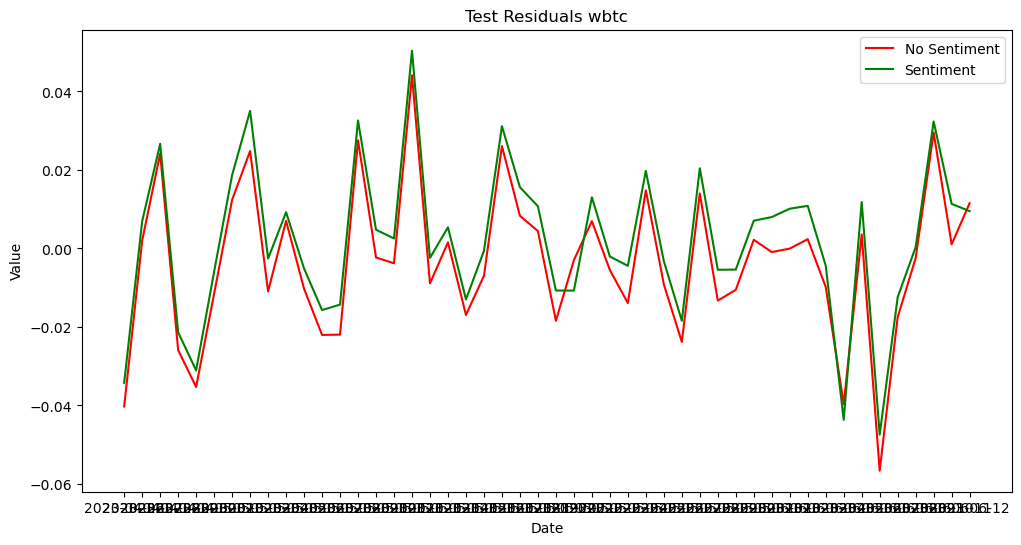

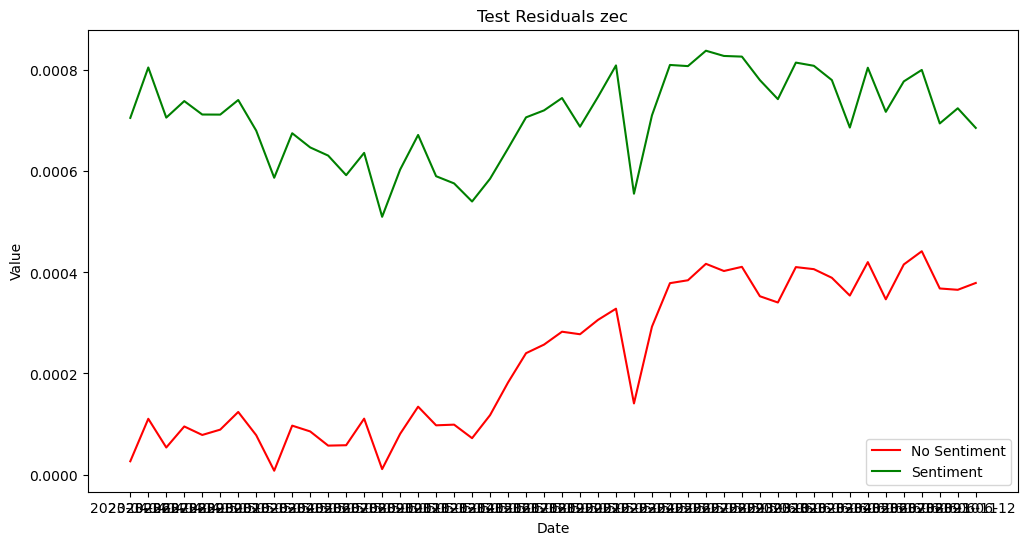

In [42]:
# Test Residuals BASE MODEL
for coin in coin_list:
    coin_data = merged_data[merged_data['Coin'] == coin]
    plt.figure(figsize=(12, 6))
    plt.plot(coin_data['Date'], coin_data['Residual'], label='No Sentiment', color='red')
    plt.plot(coin_data['Date'], coin_data['Residual_social'], label='Sentiment', color='green')
    plt.title(f'Test Residuals {coin}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

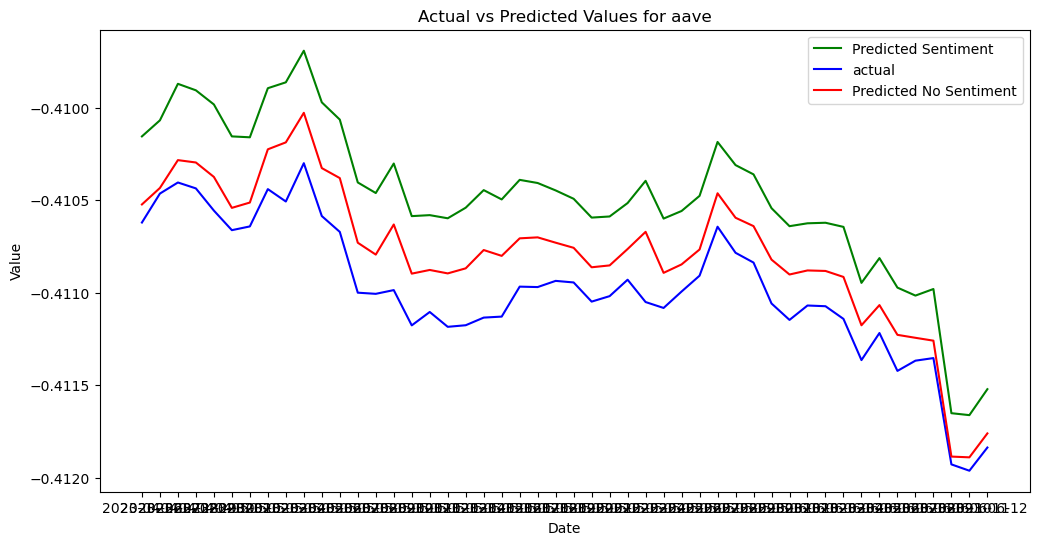

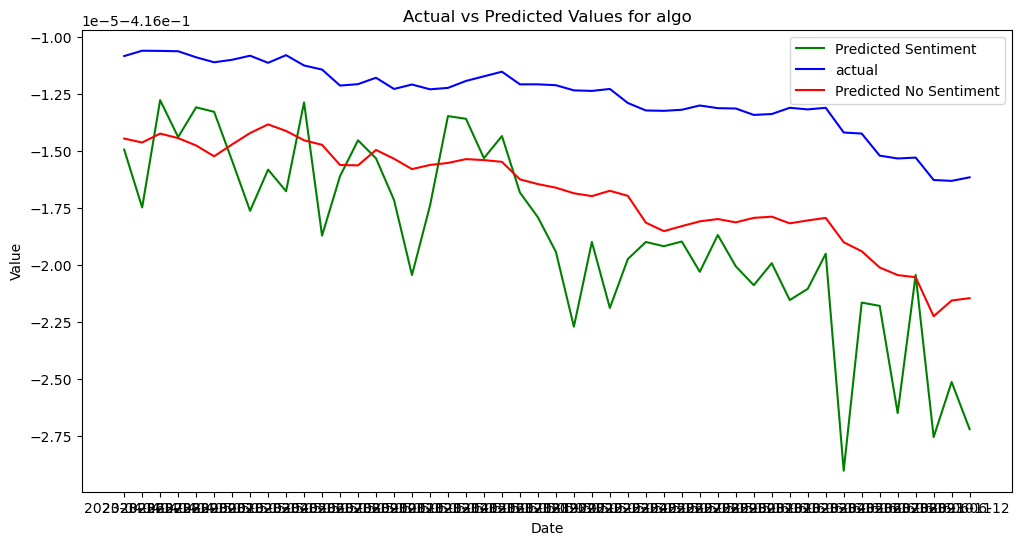

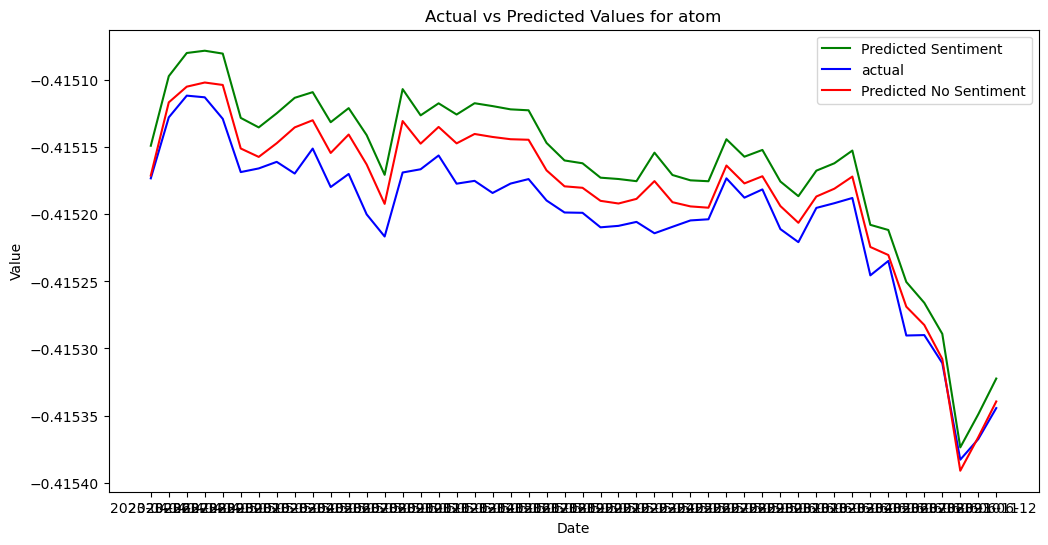

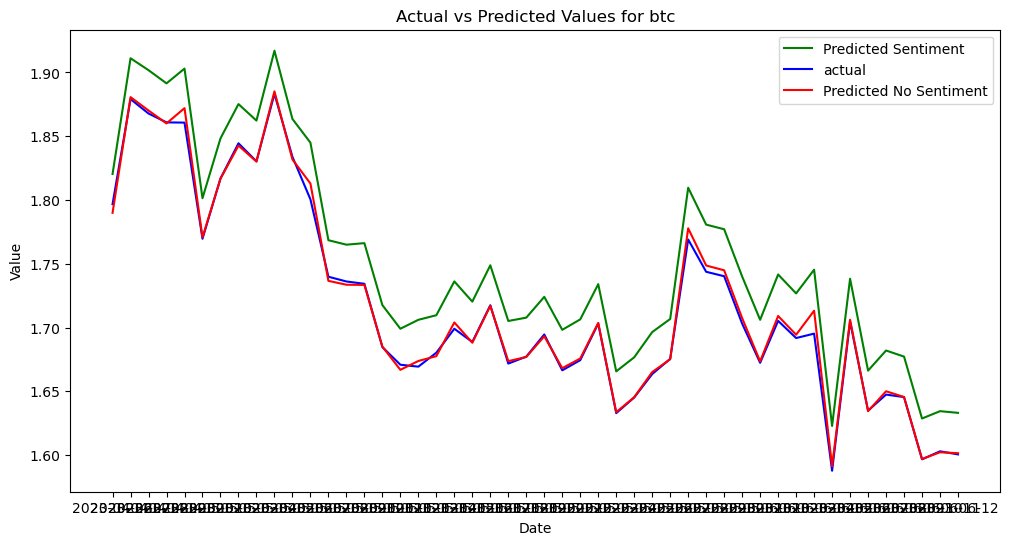

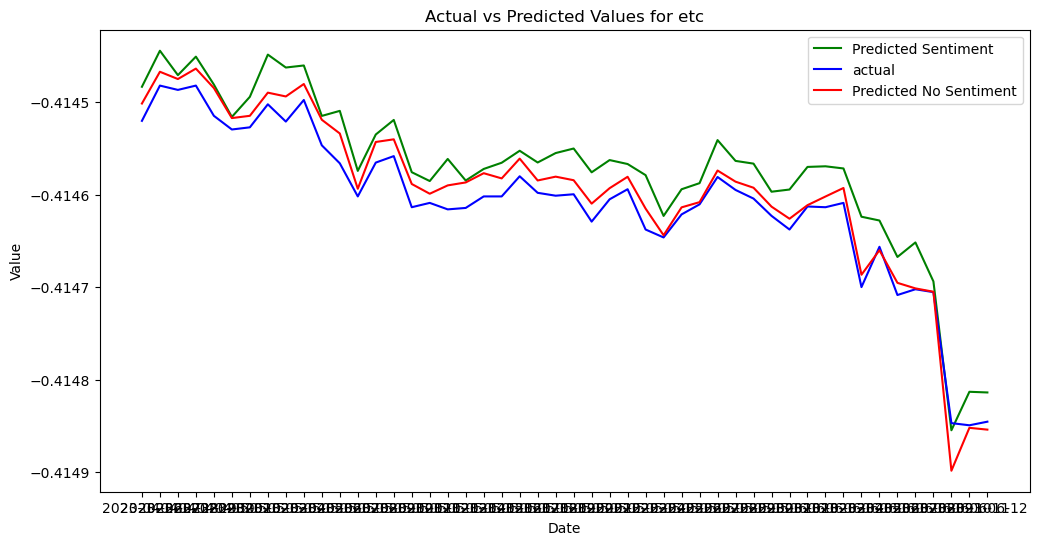

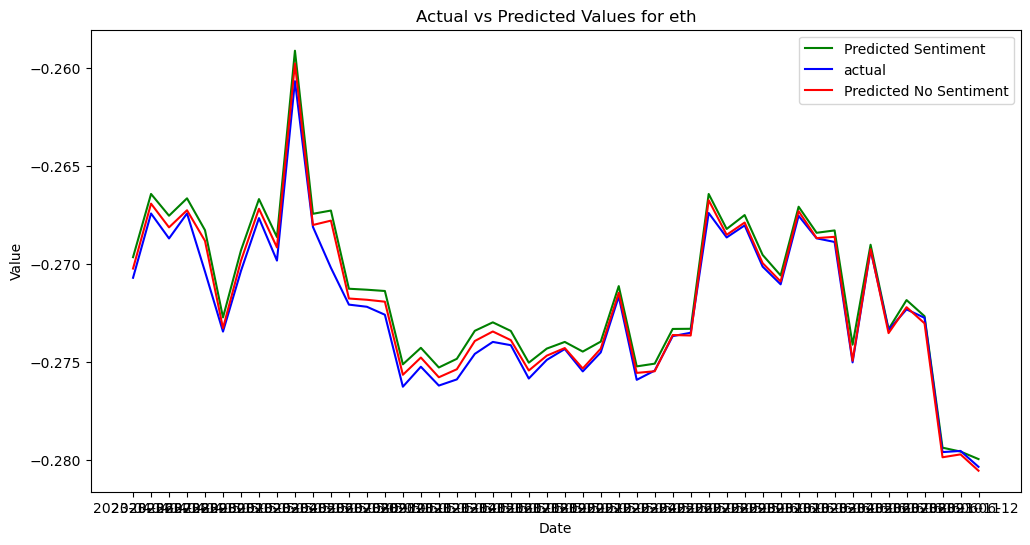

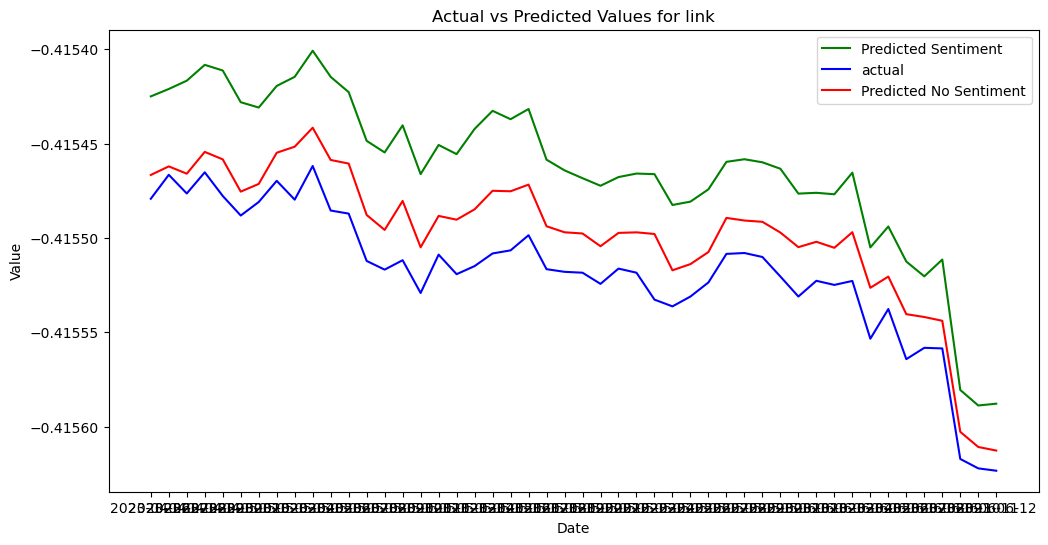

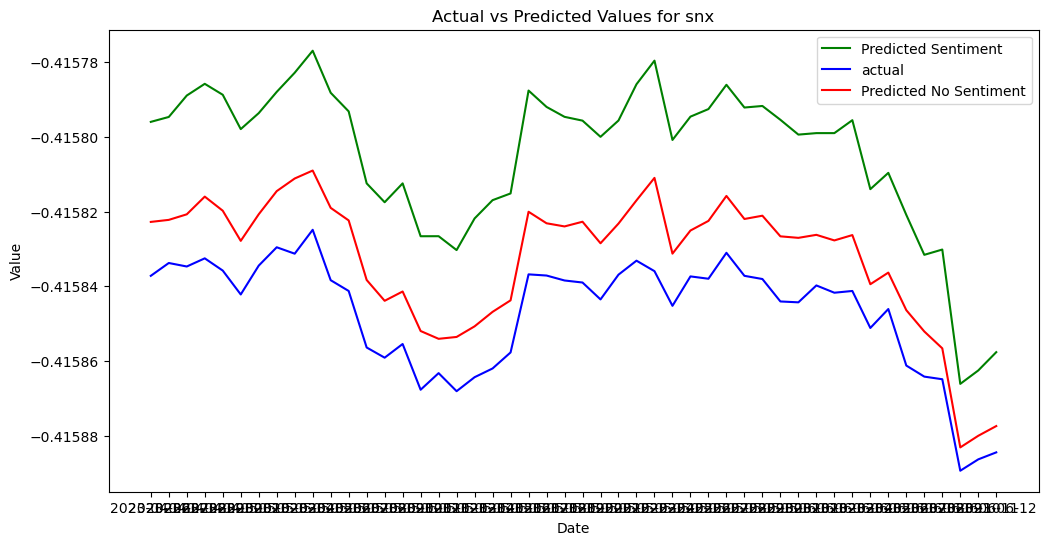

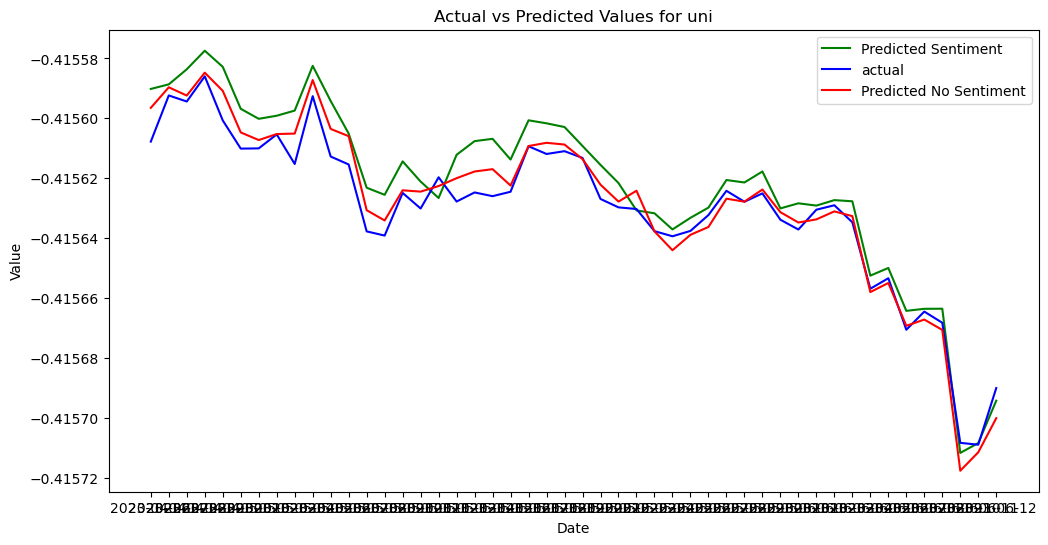

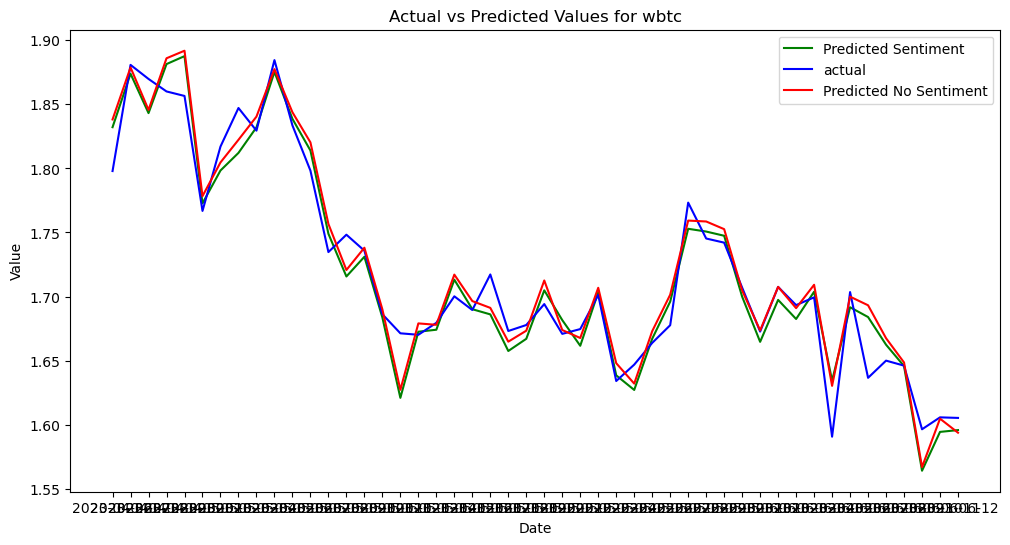

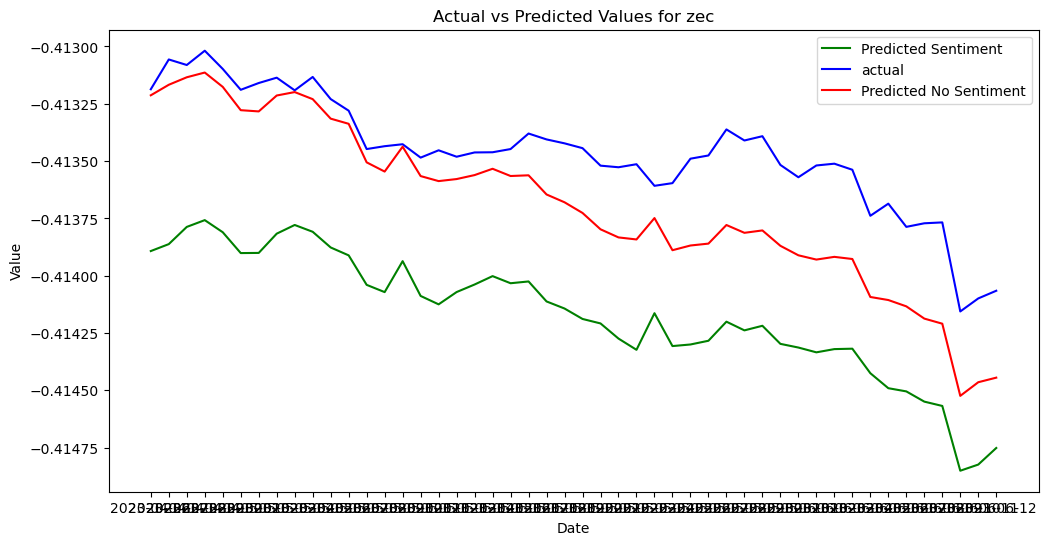

In [44]:
#Test Actual v. Predicted
for coin in coin_list:
    coin_data = merged_data[merged_data['Coin'] == coin]
    plt.figure(figsize=(12, 6))
    plt.plot(coin_data['Date'], coin_data['predicted_social'], label='Predicted Sentiment', color='green')
    plt.plot(coin_data['Date'], coin_data['actual'], label='actual', color='blue')
    plt.plot(coin_data['Date'], coin_data['predicted'], label='Predicted No Sentiment', color='red')
    plt.title(f'Actual vs Predicted Values for {coin}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

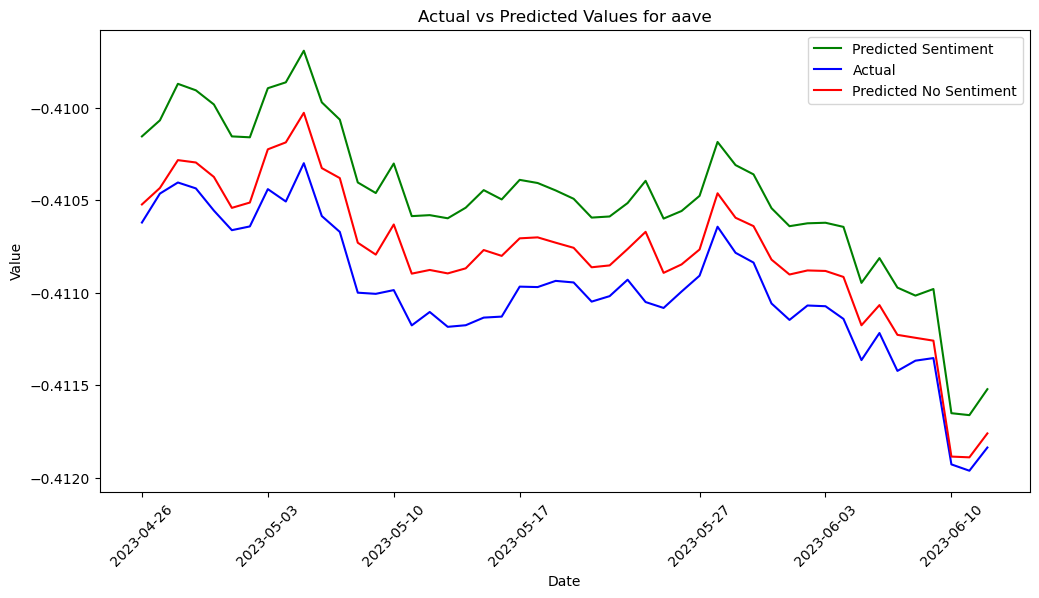

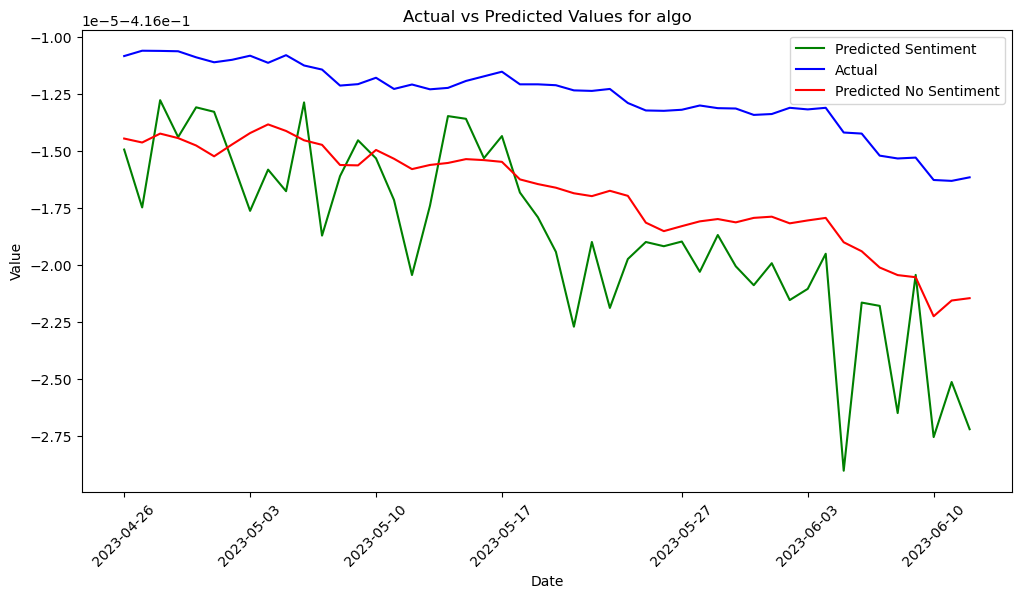

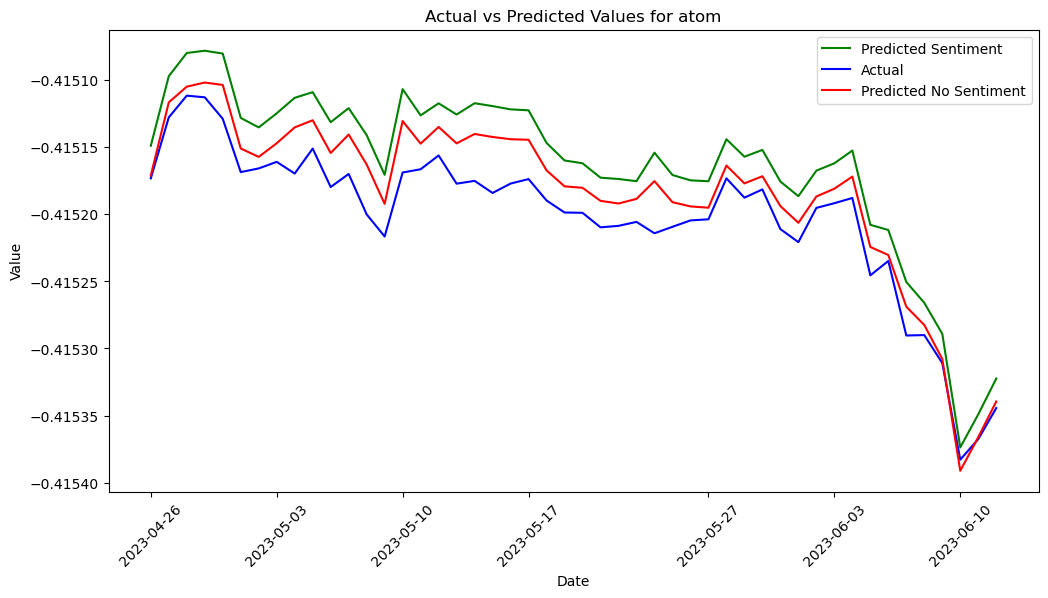

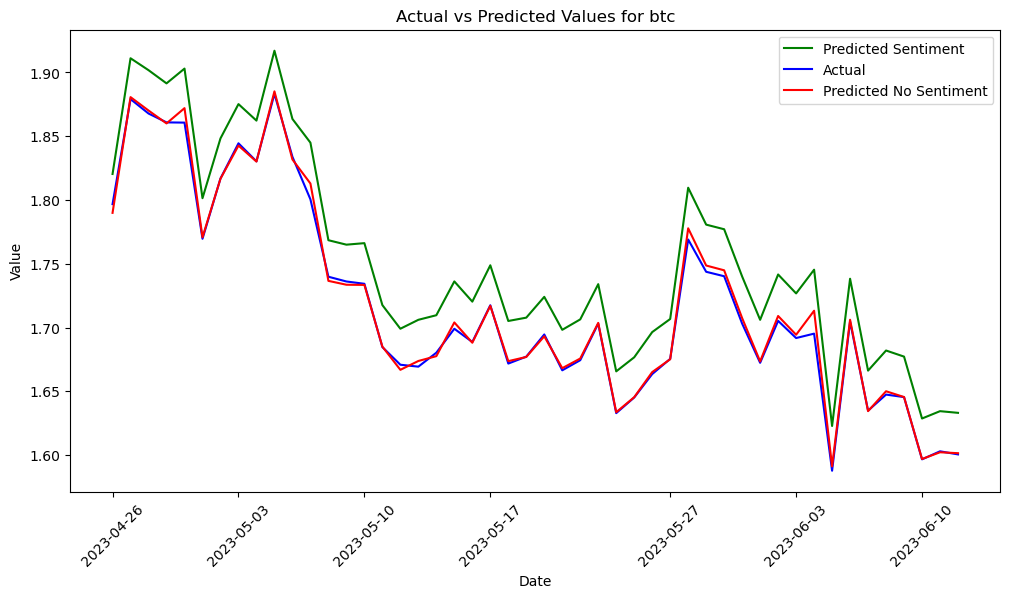

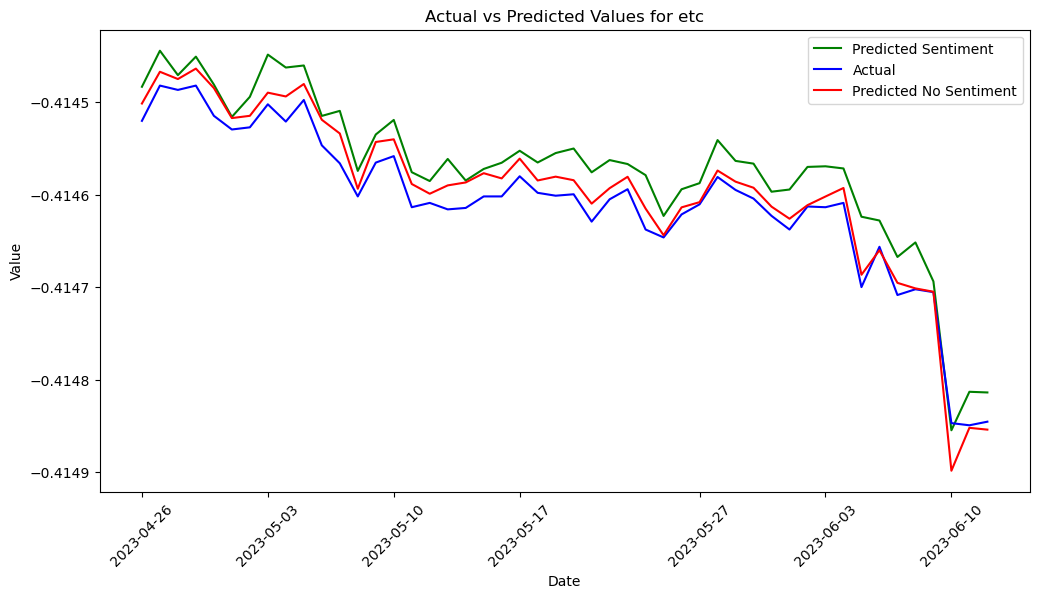

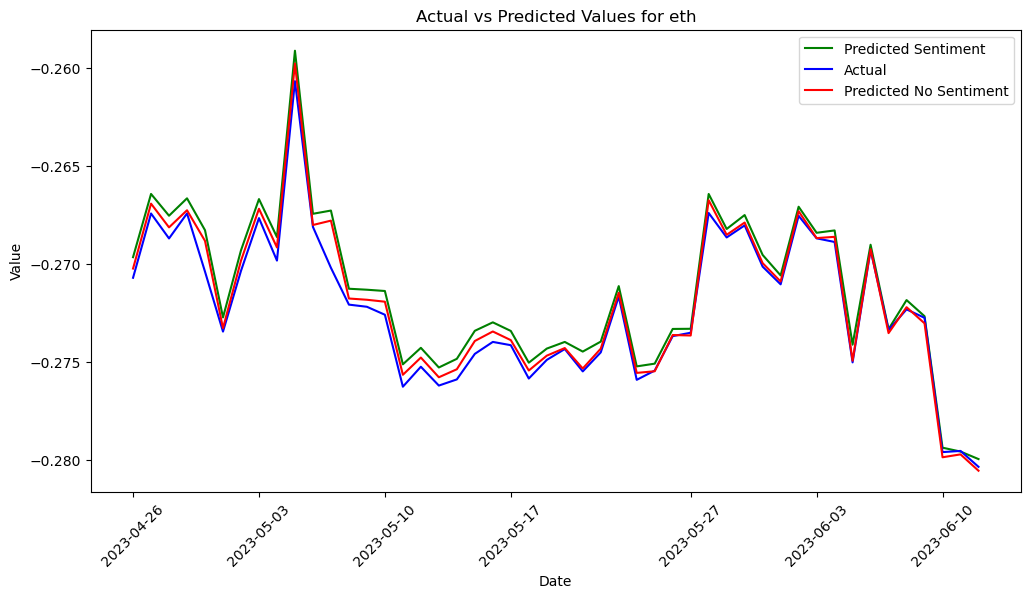

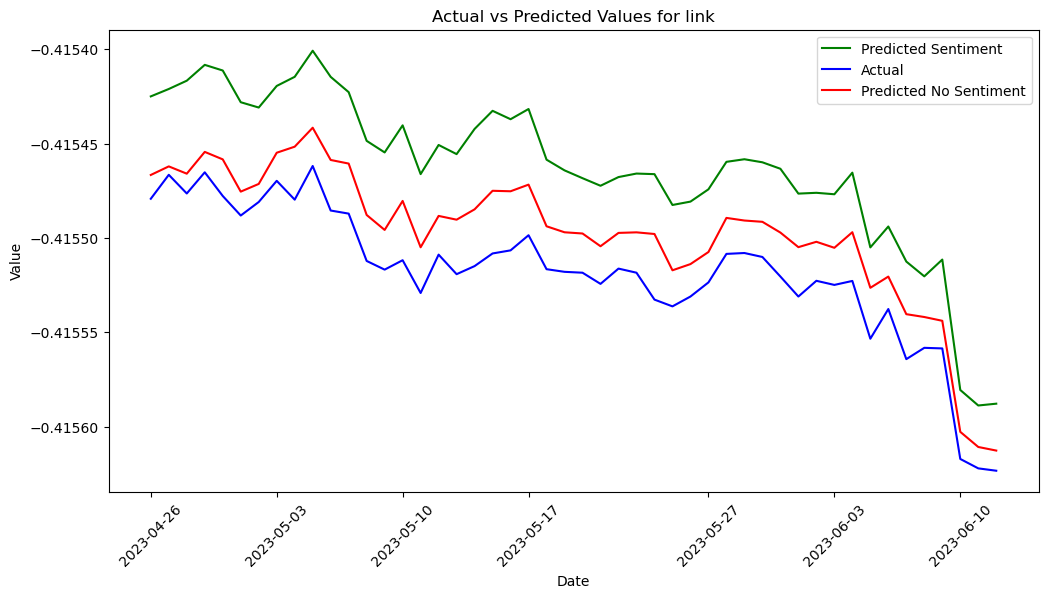

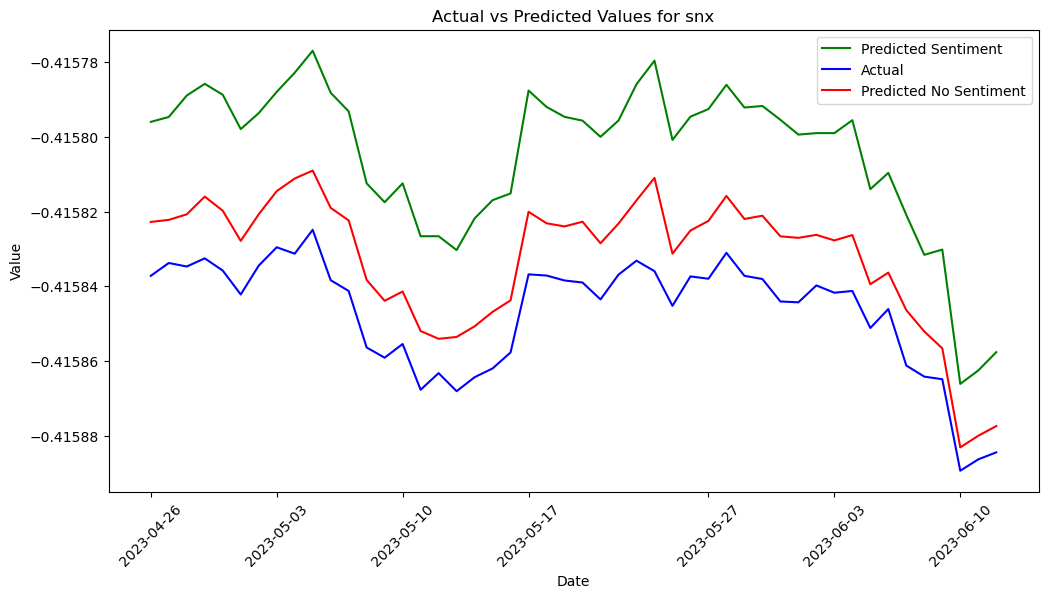

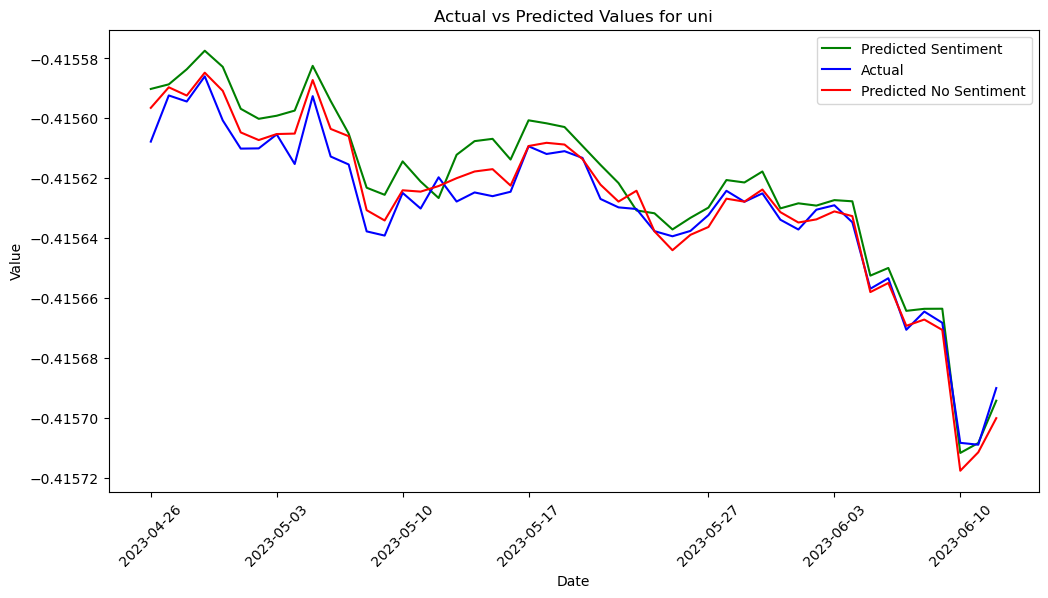

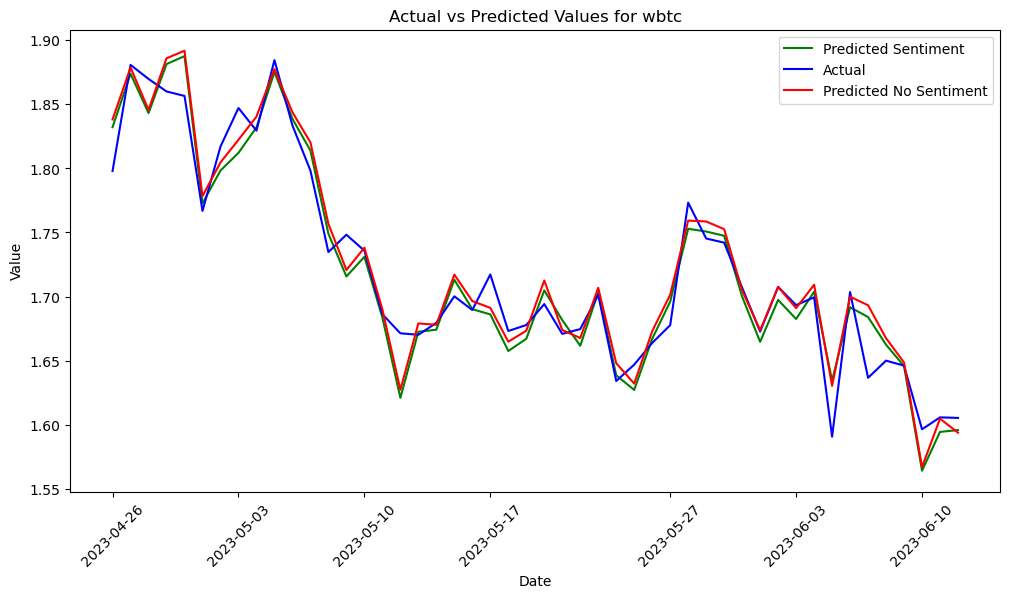

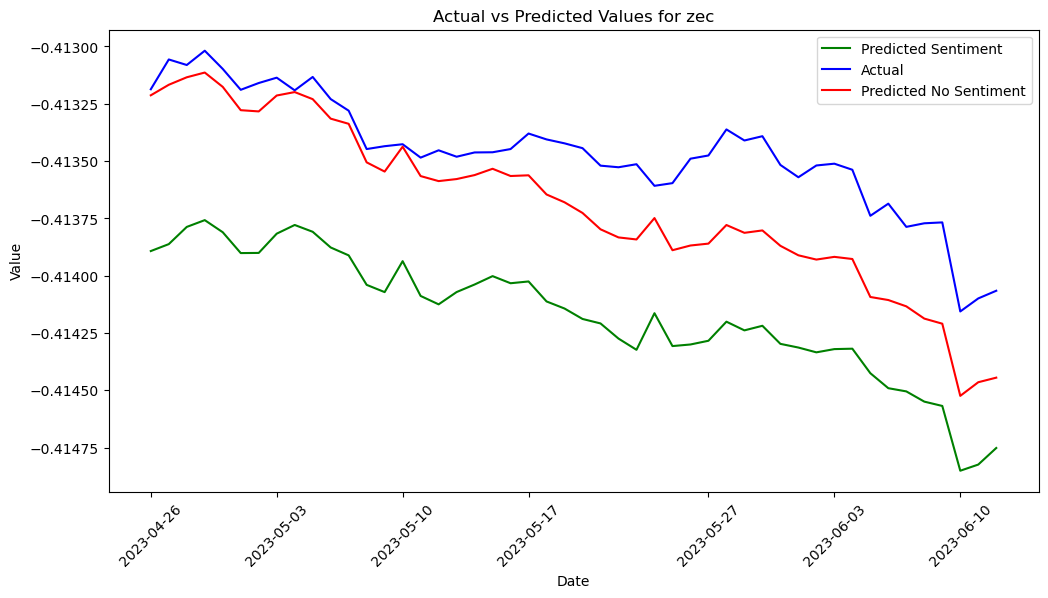

In [46]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

for coin in coin_list:
    coin_data = merged_data[merged_data['Coin'] == coin]
    plt.figure(figsize=(12, 6))

    plt.plot(coin_data['Date'], coin_data['predicted_social'], label='Predicted Sentiment', color='green')
    plt.plot(coin_data['Date'], coin_data['actual'], label='Actual', color='blue')
    plt.plot(coin_data['Date'], coin_data['predicted'], label='Predicted No Sentiment', color='red')

    plt.title(f'Actual vs Predicted Values for {coin}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()

    # Rotate and format date labels
    plt.xticks(rotation=45)  # Rotate labels
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Auto adjust dates
   
    plt.show()
